## 감정 분석
항공사 리뷰 데이터로 감정 분석하기 (트위터에 데이터 사용)

In [1]:
import pandas as pd
import re, os
pd.set_option('display.max_colwidth', 240)

In [2]:
PATH = '../data/'
FILE = os.path.join(PATH, 'tweets_public.csv')

tweets = pd.read_csv(FILE)
tweets.sample(1)

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
5671,negative,True,0,0,@Iberia desde ayer por la noche están estudiando mi caso. Es sencillo: saqué un pasaje para llegar a gran Canaria a las dos y media.,NaN,Thu Oct 26 11:43:03 +0000 2017,923515314800939009,NaN,NaN


In [3]:
# text 정제를 위해서 text 열만 골라냄
tweets = tweets.loc[:, ['text', 'airline_sentiment']]
tweets.sample(5)

,text,airline_sentiment
398,"@LosMorancos @Ryanair ""Sabré"" por experiencia, porque he volado mucho con ellos. \n\nPor supuesto que tú vuelas más q… https://t.co/VauzYAbulG",positive
4257,El personal de tierra de Ryanair en España convoca huelga el próximo día 30 de diciembre https://t.co/dPOYCHU4P2 https://t.co/niOgeOd2Sv,neutral
7029,Me ha gustado un vídeo de @YouTube (https://t.co/Ixs6t0Jbk2 - Ryanair passenger jumps out emergency exit in Malaga (Boeing 737)).,negative
7208,@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM… https://t.co/74rih99A3p,negative
3457,El comité de empresa de Iberia convoca huelga en El Prat entre el 21 y 24 diciembre https://t.co/TjGUgKsuzQ,negative


In [4]:
# @장소를 다른 열로 저장하기
tweets['at'] = tweets.text.str.extract(r'^(@\S+)')
tweets.sample(5)

,text,airline_sentiment,at
4979,Anuncian expansión de Iberia en Puerto Rico https://t.co/Ju6SBN9cXg https://t.co/N8oke0H9AE,negative,NaN
1228,"#madrid #venezuela Ryanair sigue con las rebajas del Black Friday: billetes a 4,99 euros https://t.co/E7Kzttsma5 https://t.co/JNXm2W12sc",positive,NaN
1132,Qué decir de los 807 y llamadas internacionales @IBConsum @xiscod https://t.co/CxggUjemmJ,neutral,NaN
4808,Nicaragua quiere aprovechar a Iberia para promover su turismo en Europa https://t.co/xiFLMkf7sR vía @elnuevodiario,positive,NaN
5870,.@Alfa_Laval Iberia continua su plan de expansión con la apertura de un nuevo centro de servicio en #Madrid… https://t.co/YRNd656MPz,positive,NaN


In [5]:
# 텍스트에서 hashtag, @, http 제거하기
def remove_handles(text):
    return re.sub(r'@\S+|https://\S+|\#', '', text) # @, hashtag, address 삭제

tweets.text = tweets.text.apply(remove_handles)
tweets.sample(10)

,text,airline_sentiment,at
4558,"Uno no deja de sorprenderse por la basura de la app de A ver, ¿se puede saber cómo cojones se pueden busca…",negative,NaN
6525,Me encanta viajar y a mi pareja también... y aún no tengo regalo de reyes...y me sacarías del apuro Ryanair 😓,positive,@Ryanair_ES
5223,los vuelos donde he viajado usando avios más euros acumulan avios en la tarjeta iberia?,negative,@Iberia
3302,bueno nos gustaria tener la primera experiencia de viajar con ustedesd saludos,positive,@Iberia
7478,❤️❤️❤️ enhorabuena,neutral,NaN
4201,"Los de Ryanair son unos cerdos. Deberían irse a pique. La compañía, no los vuelos, que seguro que algún hiperventilado salta.",negative,@sninobecerra
1032,"Viajo en la aerolinea Level desde Barcelona, y combino con Ryanair. Todo low cost",neutral,@carreteandoblog
2485,Si yo llego tarde a un vuelo me jodo y tengo que pagar otro billete se retrasa y lo máximo que te dicen…,negative,NaN
5779,"Lejos de agilizarlo lo empeoró. Sin explicaciones, el personal hablándonos exclusivamente en italiano (intu…",negative,@Iberia
6271,Yo con gibson bastante air france iberia easyjet sin cargo ryanair cobro y mucho. Sismpre llevarla con…,neutral,@InfoViajera


### 감정분석
- textblob: 영어밖에 지원이 안 됨. 스페인어->영어 변환 후 사용
- sentiment_analysis_spanish

In [6]:
from textblob import TextBlob

In [7]:
# es -> en 변환
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    language = analysis.detect_language()
    if language == 'en':
        analysis_ready = analysis
    else: # 영어가 아닌 언어는 영어로 바꿈
        analysis_ready = analysis.translate(to='en')

    if analysis_ready.sentiment.polarity > 0: # polarity를 측정하는 메소드를 가짐
        return 'positive'
    elif analysis_ready.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [8]:
# 예시
sentence = 'I hate New York.'
blob = TextBlob(sentence)
blob.sentiment # [-1, 1]

Sentiment(polarity=-0.33181818181818185, subjectivity=0.6772727272727272)

In [9]:
# 랜덤으로 한 문장 뽑기
sentence = tweets.text.sample(1).tolist()
sentence

['Ahora si no hay excusa para ir a ver al mejor club del mundo  🇳🇮🇳🇮 gracias  y la gestión del… ']

In [10]:
get_tweet_sentiment(sentence[0])

'positive'

#### sentiment_analysis_spanish
0~1로 표현. neg-pos

In [11]:
from sentiment_analysis_spanish import sentiment_analysis

In [14]:
#test
senti_analizer = sentiment_analysis.SentimentAnalysisSpanish()
print(senti_analizer.sentiment("Me gusta la tombola. Es genial.")) # positive

0.9304396176531412


In [15]:
tweets['polarity'] = tweets.text.apply(senti_analizer.sentiment)
tweets.head(3)

,text,airline_sentiment,at,polarity
0,Trabajar en Ryanair como TMA: empleo,neutral,NaN,0.230391
1,Cuando gusten en Cancún se viaja y disfruta de manera sin igual,neutral,@Iberia,0.025044
2,"Sabiais que te trata muy bien en santiago de chile?Te cambia el asiento,te manda a volar en el wc trasero,e…",negative,NaN,0.350941


In [16]:
# sorting
tweets.sort_values(by=['polarity'], ascending=False).head(10)

,text,airline_sentiment,at,polarity
3216,Vistas que no tenemos todos los días. Un A330 de Iberia en aproximación por el centro de Madrid,neutral,NaN,1.000000
1536,Iberia tendrá nuevas conexiones en 2018 desde el aeropuerto de Madrid hacia Managua y San Francisco…,positive,NaN,1.000000
5240,La aerolínea tendrá nuevas conexiones en 2018 desde el aeropuerto de Madrid hacia Managua y SanFrancisco,positive,NaN,1.000000
92,La aerolínea tendrá nuevas conexiones en 2018 desde el aeropuerto de Madrid hacia Managua y SanFrancisco,neutral,NaN,1.000000
6808,Samsung e Iberia sorprenden a los viajeros de un vuelo de Madrid a La Coruña con un «regalazo» vía,positive,NaN,1.000000
3403,Samsung e Iberia sorprenden a los viajeros de un vuelo de Madrid a La Coruña con un «regalazo» vía,positive,NaN,1.000000
2909,muchas gracias al personal de Business en aeropuerto de Madrid.La ayuda en situación complicada muestra su gran profesionalidad,positive,@Iberia,1.000000
5208,Iberia remodela su zona VIP del aeropuerto de Madrid con muchas comodidades:,positive,NaN,0.999999
7001,"Un muy buen destino, me encantó 👋👋👋",positive,@AParayas,0.999998
4468,Iberia inaugura un nuevo espacio Premium en el aeropuerto de Madrid,neutral,NaN,0.999998


In [17]:
#option 1. polarity 점수 구간에 따라 레이블을 positive, negative로 나누기 (2가지)

tweets['label'] = tweets.polarity.apply(lambda x: 'positive' if x >= 0.5 else 'negative')
tweets.head(5)

,text,airline_sentiment,at,polarity,label
0,Trabajar en Ryanair como TMA: empleo,neutral,NaN,0.230391,negative
1,Cuando gusten en Cancún se viaja y disfruta de manera sin igual,neutral,@Iberia,0.025044,negative
2,"Sabiais que te trata muy bien en santiago de chile?Te cambia el asiento,te manda a volar en el wc trasero,e…",negative,NaN,0.350941,negative
3,"NUNCA NUNCA NUNCA pidáis el café de Ryanair.\nBueno, nada que vendan a bordo.",negative,NaN,0.000305,negative
4,Muchos éxito…,positive,@cris_tortu,0.555005,positive


In [18]:
#option 2. airline_sentiment에 따라 나누기 (3가지)

def tag_label(sentiment):
    sentiment = sentiment.lower()
    
    if sentiment == 'neutral':
        return 0
    elif sentiment == 'positive':
        return 1
    else:
        return 2
        
tweets['label'] = tweets.airline_sentiment.apply(tag_label)
tweets.head(5)

,text,airline_sentiment,at,polarity,label
0,Trabajar en Ryanair como TMA: empleo,neutral,NaN,0.230391,0
1,Cuando gusten en Cancún se viaja y disfruta de manera sin igual,neutral,@Iberia,0.025044,0
2,"Sabiais que te trata muy bien en santiago de chile?Te cambia el asiento,te manda a volar en el wc trasero,e…",negative,NaN,0.350941,2
3,"NUNCA NUNCA NUNCA pidáis el café de Ryanair.\nBueno, nada que vendan a bordo.",negative,NaN,0.000305,2
4,Muchos éxito…,positive,@cris_tortu,0.555005,1


#### visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
tweets.label.value_counts() # 주로 부정적인 데이터가 많음.

2    3769
0    2609
1    1489
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


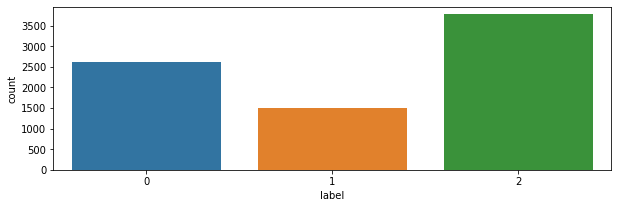

In [28]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10, 3)
sns.countplot(tweets.label)
plt.show()

In [20]:
# 파일로 저장
out_file = os.path.join(PATH, 'tweets_public_polarity.csv')
tweets.to_csv(out_file, sep='\t', encoding='utf-8')